<a href="https://colab.research.google.com/github/Shigraf-Khalid/Email-Spam-Dictator/blob/main/Email_Spam_Dictator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install nltk

In [11]:
!pip install -q wordcloud
import -q workcloud
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [12]:
import pandas as pd

In [13]:
import numpy as np


In [19]:
import matplotlib.pyplot as plt


In [21]:
import seaborn as sns

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
from sklearn.svm import SVC

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv('/content/mail_data.csv')

In [29]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


from matplotlib import pyplot as plt
import seaborn as sns
_df_19.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_20.groupby('Message').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Message'].value_counts()
    for x_label, grp in _df_21.groupby('Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Category')
_ = plt.ylabel('Message')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [31]:
print('shape of dataset',df.shape)

shape of dataset (5572, 2)


In [32]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [55]:
print('count of Category:\n', df['Category'].value_counts())

count of Category:
 Category
ham     4825
spam     747
Name: count, dtype: int64


In [56]:
print("Not a Spam Email Ratio i.e. 0 Category:",round(len(df[df['Category']==0])/len(df['Category']),2)*100,"%")
print("Spam Email Ratio that is 1 Category:",round(len(df[df['Category']==1])/len(df['Category']),2)*100,"%")

Not a Spam Email Ratio i.e. 0 Category: 0.0 %
Spam Email Ratio that is 1 Category: 0.0 %


In [58]:
df['length']=df.Message.str.len()
df.head()

,Category,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [59]:
df['Message']=df['Message'].str.lower()
df.head()

,Category,Message,length
0,ham,"go until jurong point, crazy.. available only ...",111
1,ham,ok lar... joking wif u oni...,29
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155
3,ham,u dun say so early hor... u c already then say...,49
4,ham,"nah i don't think he goes to usf, he lives aro...",61


In [60]:
# Replace email addresses with 'email'
df['Message'] = df['Message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
# Replace URLs with 'webaddress'
df['Message'] = df['Message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
# Replace currency symbols
df['Message'] = df['Message'].str.replace(r'£|\$', 'dollers')
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['Message'] = df['Message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
#replace numeric chars with 'numbr'
df['Message'] = df['Message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [61]:
#remove punctuations
df['Message'] = df['Message'].str.replace(r'[^\w\d\s]', ' ')
#replce whitespace btw terms with single space
df['Message'] = df['Message'].str.replace(r'\s+', ' ')
#remove leading and trailing whitesspace
df['Message'] = df['Message'].str.replace(r'^\s+|\s+?$', '')

In [62]:
df.head()

,Category,Message,length
0,ham,"go until jurong point, crazy.. available only ...",111
1,ham,ok lar... joking wif u oni...,29
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155
3,ham,u dun say so early hor... u c already then say...,49
4,ham,"nah i don't think he goes to usf, he lives aro...",61


from matplotlib import pyplot as plt
_df_12['length'].plot(kind='hist', bins=20, title='length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_13.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_14.groupby('Message').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['length'].plot(kind='line', figsize=(8, 4), title='length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Message'].value_counts()
    for x_label, grp in _df_16.groupby('Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Category')
_ = plt.ylabel('Message')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='length', y='Category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Message'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='length', y='Message', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from matplotlib import pyplot as plt
_df_15['length'].plot(kind='line', figsize=(8, 4), title='length')
plt.gca().spines[['top', 'right']].set_visible(False)

In [65]:
import string
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df['Message'] = df['Message'].apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))

In [67]:
df['clean_length'] = df.Message.str.len()
df.head()

,Category,Message,length,clean_length
0,ham,"go jurong point, crazy.. available bugis n gre...",111,91
1,ham,ok lar... joking wif oni...,29,27
2,spam,free entry wkly comp win fa cup final tkts 21s...,155,139
3,ham,dun say early hor... c already say...,49,37
4,ham,"nah think goes usf, lives around though",61,39


from matplotlib import pyplot as plt
_df_0['length'].plot(kind='hist', bins=20, title='length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['clean_length'].plot(kind='hist', bins=20, title='clean_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Message').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='length', y='clean_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['length'].plot(kind='line', figsize=(8, 4), title='length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['clean_length'].plot(kind='line', figsize=(8, 4), title='clean_length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Message'].value_counts()
    for x_label, grp in _df_7.groupby('Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Category')
_ = plt.ylabel('Message')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='length', y='Category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Message'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='length', y='Message', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='clean_length', y='Category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['Message'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='clean_length', y='Message', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Message').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [68]:

print("Original Length:",df.length.sum())
print("Cleaned Length:",df.clean_length.sum())
print("Total Words Removed:",(df.length.sum()) - (df.clean_length.sum()))

Original Length: 447816
Cleaned Length: 325013
Total Words Removed: 122803


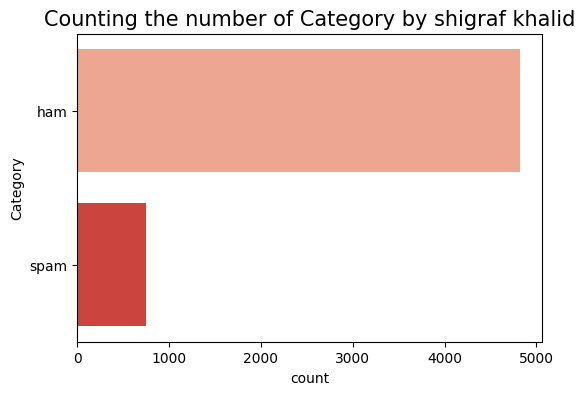

Category
ham     4825
spam     747
Name: count, dtype: int64


In [79]:
plt.figure(figsize=(6,4))
sns.countplot(df['Category'],palette= 'Reds')
plt.title("Counting the number of Category by shigraf khalid",fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()
print(df.Category.value_counts())

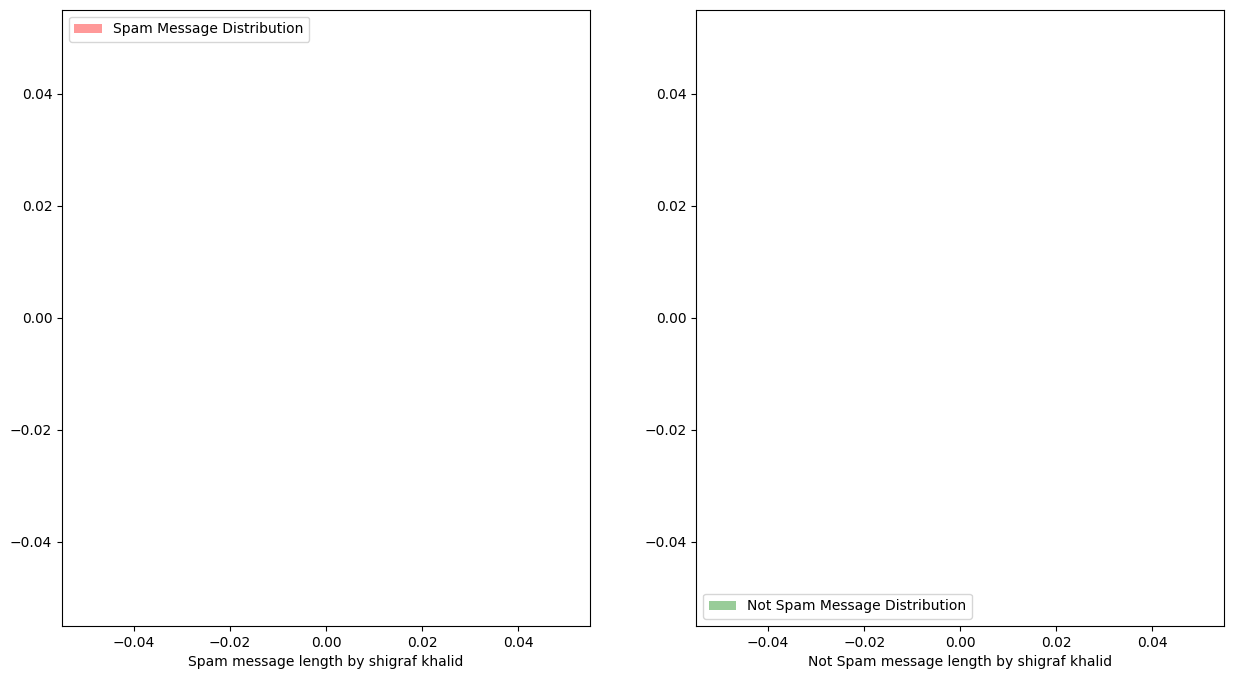

In [89]:
f,ax = plt.subplots(1,2,figsize=(15,8))

sns.distplot(df[df['Category']==1]['length'],bins=20, ax=ax[0],label='Spam Message Distribution',color='r')
ax[0].set_xlabel('Spam message length by shigraf khalid')
ax[0].legend()

sns.distplot(df[df['Category']==0]['length'],bins=20, ax=ax[1],label='Not Spam Message Distribution',color='g')
ax[1].set_xlabel('Not Spam message length by shigraf khalid')
ax[1].legend()

new_var = plt.show()

new_var=plt.show()

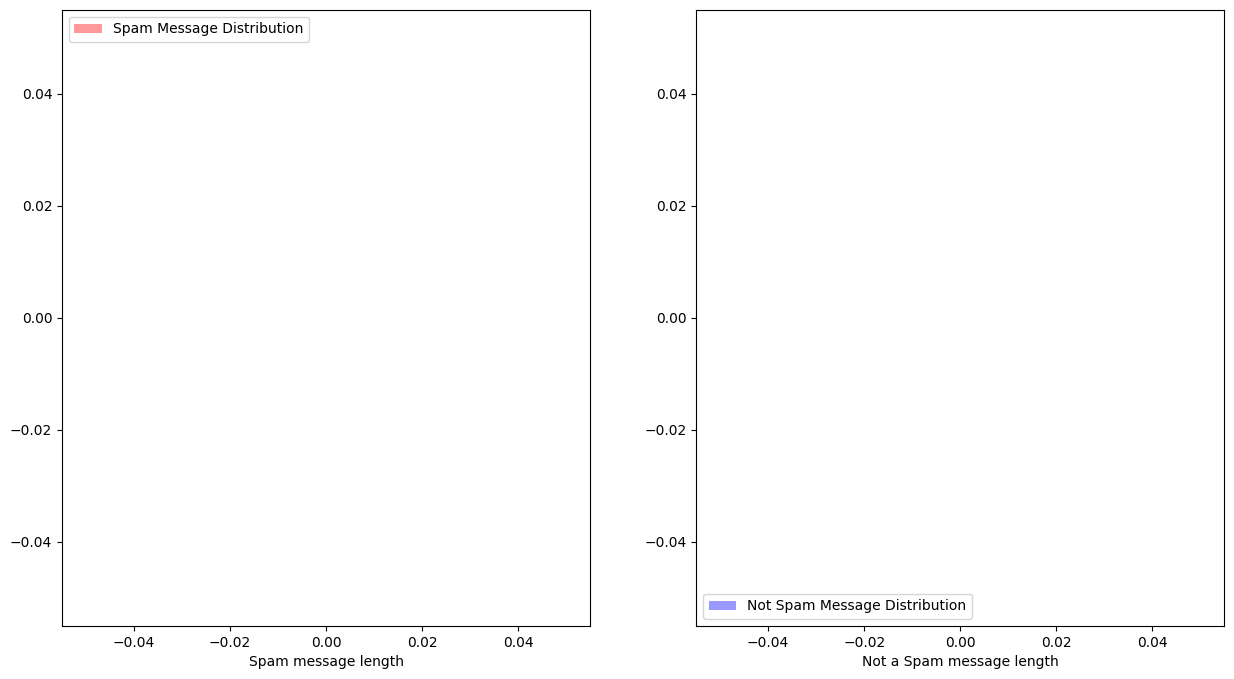

In [95]:
f,ax = plt.subplots(1,2,figsize=(15,8))

sns.distplot(df[df['Category']==1]['clean_length'],bins=20, ax=ax[0],label='Spam Message Distribution',color='r')
ax[0].set_xlabel('Spam message length')
ax[0].legend()

sns.distplot(df[df['Category']==0]['clean_length'],bins=20, ax=ax[1],label='Not Spam Message Distribution',color='b')
ax[1].set_xlabel('Not a Spam message length')
ax[1].legend()

plt.show()